In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# title: title name given to the earthquake
# magnitude: The magnitude of the earthquake
# date_time: date and time
# cdi: The maximum reported intensity for the event range
# mmi: The maximum estimated instrumental intensity for the event
# alert: The alert level - “green”, “yellow”, “orange”, and “red”
# tsunami: "1" for events in oceanic regions and "0" otherwise
# sig: A number describing how significant the event is. Larger numbers indicate a more significant event. This value is determined on a number of factors, including: magnitude, maximum MMI, felt reports, and estimated impact
# net: The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.
# nst: The total number of seismic stations used to determine earthquake location.
# dmin: Horizontal distance from the epicenter to the nearest station
# gap: The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties
# magType: The method or algorithm used to calculate the preferred magnitude for the event
# depth: The depth where the earthquake begins to rupture
# latitude / longitude: coordinate system by means of which the position or location of any place on Earth's surface can be determined and described
# location: location within the country
# continent: continent of the earthquake hit country
# country: affected country

In [3]:
df=pd.read_csv('earthquake_data.csv')

# INFO

In [4]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [6]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [7]:
df.isnull().sum()/df.shape[0]*100
#continent,country,alert have 73%,38%,46% null values
#we can drop continenet(too much null values)
#we have latitude and longitude so we can drop location
#alert is a unnecessary data

title         0.000000
magnitude     0.000000
date_time     0.000000
cdi           0.000000
mmi           0.000000
alert        46.930946
tsunami       0.000000
sig           0.000000
net           0.000000
nst           0.000000
dmin          0.000000
gap           0.000000
magType       0.000000
depth         0.000000
latitude      0.000000
longitude     0.000000
location      0.639386
continent    73.657289
country      38.107417
dtype: float64

In [8]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

# DROPING UNNECESSARY DATA

In [9]:
df.drop(['title', 'continent', 'alert','location'],axis=1,inplace=True)

In [10]:
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

In [11]:
df

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,Year,Month
0,7.0,8,7,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,Solomon Islands,2022,11
1,6.9,4,4,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,NaN,2022,11
2,7.0,3,3,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,Fiji,2022,11
3,7.3,5,5,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,NaN,2022,11
4,6.6,0,2,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,2022,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,NaN,2001,1
778,6.9,5,7,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,NaN,2001,1
779,7.1,0,7,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,Vanuatu,2001,1
780,6.8,0,5,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,NaN,2001,1


In [12]:
df.isnull().sum()

magnitude      0
cdi            0
mmi            0
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
country      298
Year           0
Month          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   tsunami    782 non-null    int64  
 4   sig        782 non-null    int64  
 5   net        782 non-null    object 
 6   nst        782 non-null    int64  
 7   dmin       782 non-null    float64
 8   gap        782 non-null    float64
 9   magType    782 non-null    object 
 10  depth      782 non-null    float64
 11  latitude   782 non-null    float64
 12  longitude  782 non-null    float64
 13  country    484 non-null    object 
 14  Year       782 non-null    int32  
 15  Month      782 non-null    int32  
dtypes: float64(6), int32(2), int64(5), object(3)
memory usage: 91.8+ KB


# EDA

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='magnitude', ylabel='count'>

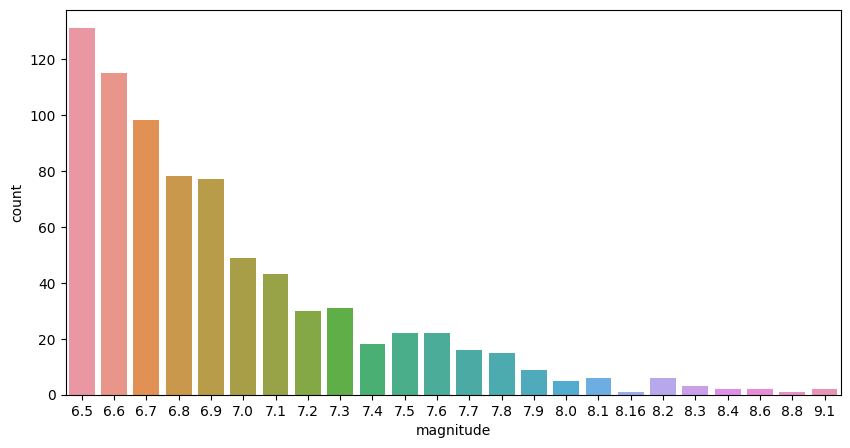

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='magnitude',data=df)
#Most earthquakes tend to be around 6.5 to 6.7 on the scale

Text(0.5, 1.0, 'TOP 15 EARTHQUAKE PRONE COUNTRIES')

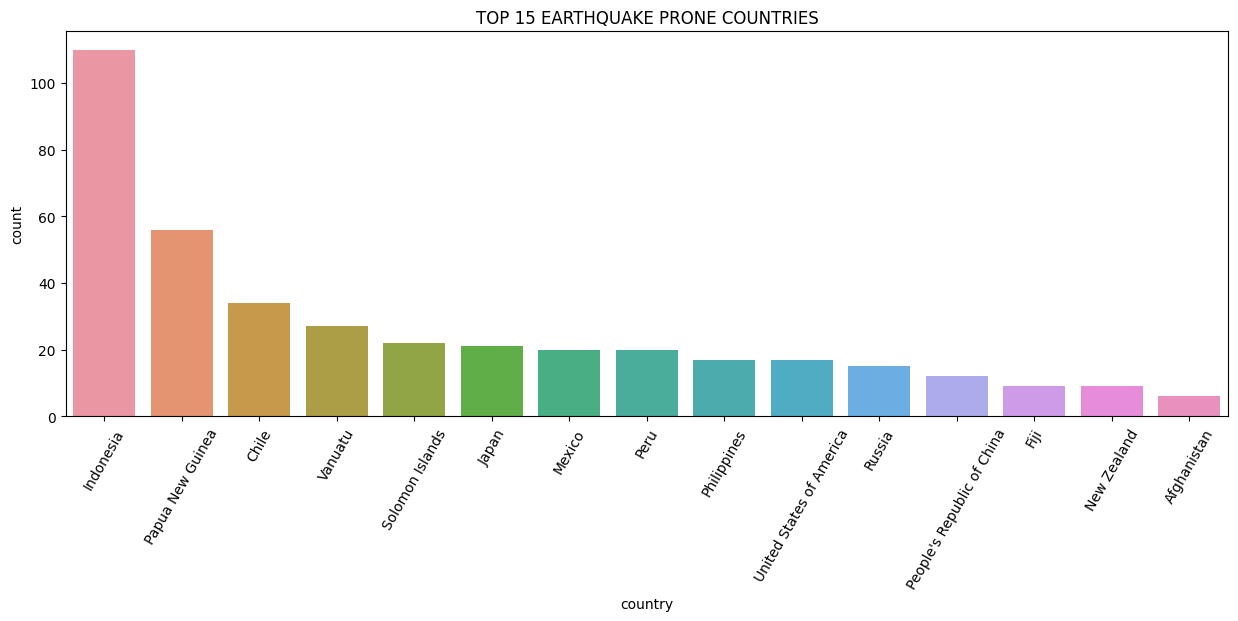

In [16]:
o=df['country'].value_counts().head(15).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o)
plt.xticks(rotation=60)
plt.title('TOP 15 EARTHQUAKE PRONE COUNTRIES')
#Indonesia has the highest number of earthquakes.

Text(0.5, 1.0, 'TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES')

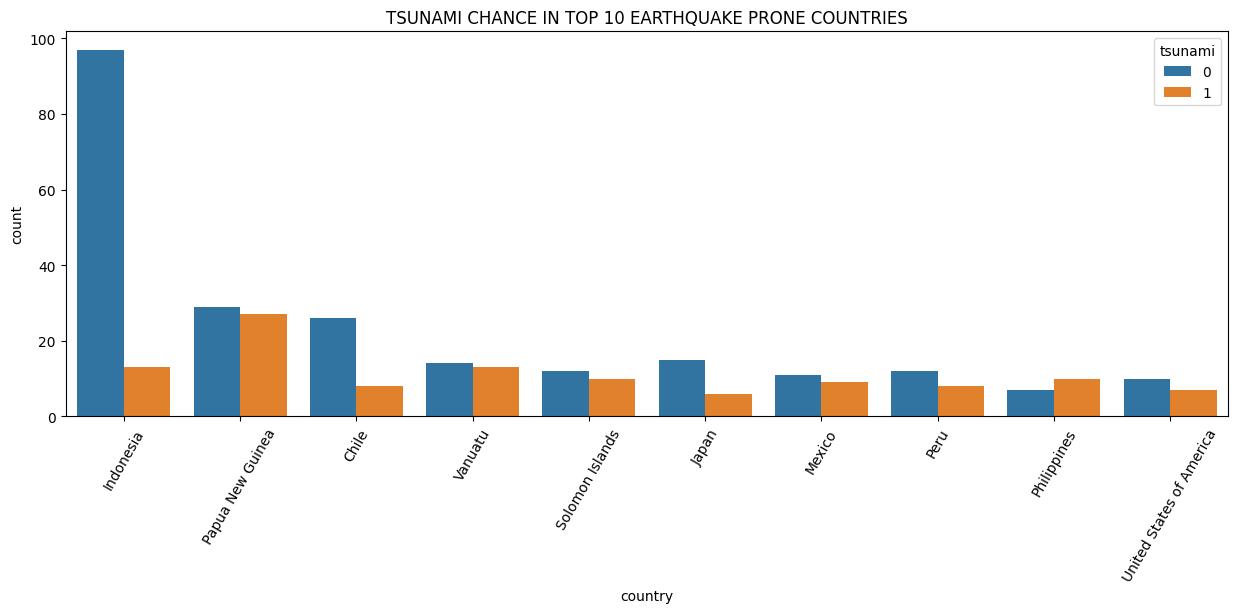

In [17]:
o=df['country'].value_counts().head(10).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o,hue='tsunami')
plt.xticks(rotation=60)
plt.title('TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES')
#Indonesia has the highest number of earthquakes worldwide, but Papua New Guinea and Philippines  has a very high risk of tsunamis following an earthquake.

<Axes: xlabel='sig', ylabel='magnitude'>

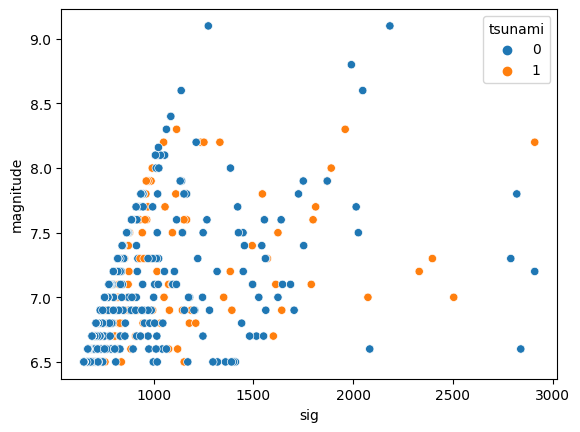

In [18]:
sns.scatterplot(x='sig',y='magnitude',data=df,hue='tsunami')
#the higher the magnitude higher the chance of tsunami

Text(0.5, 1.0, 'EARTHQUICK DATA CONTRIBUTOR')

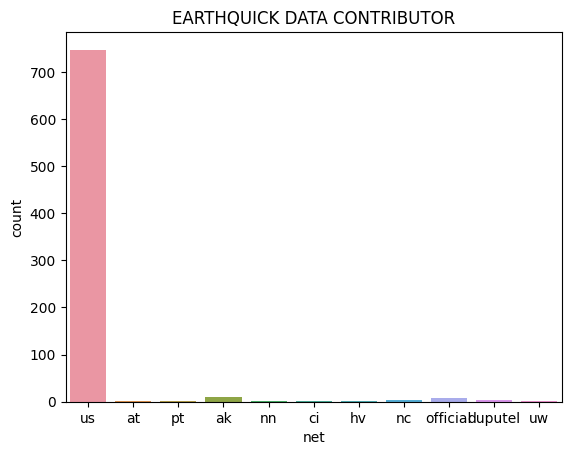

In [19]:
sns.countplot(x='net',data=df)
plt.title('EARTHQUICK DATA CONTRIBUTOR')
#The US is a major contributor of earthquake data

Text(0.5, 1.0, 'Tsunami Distribution')

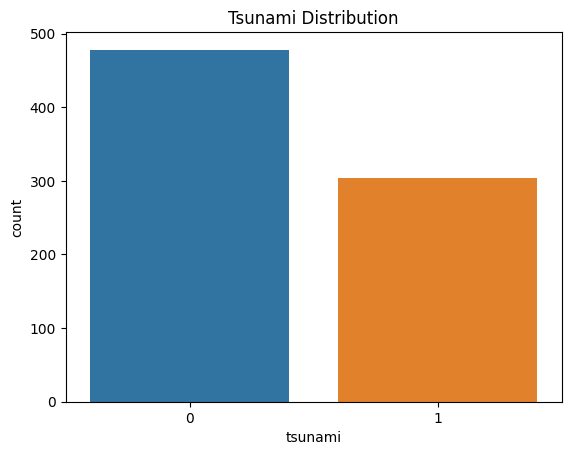

In [20]:
sns.countplot(x='tsunami',data=df)
plt.title('Tsunami Distribution')

<Axes: xlabel='Year', ylabel='count'>

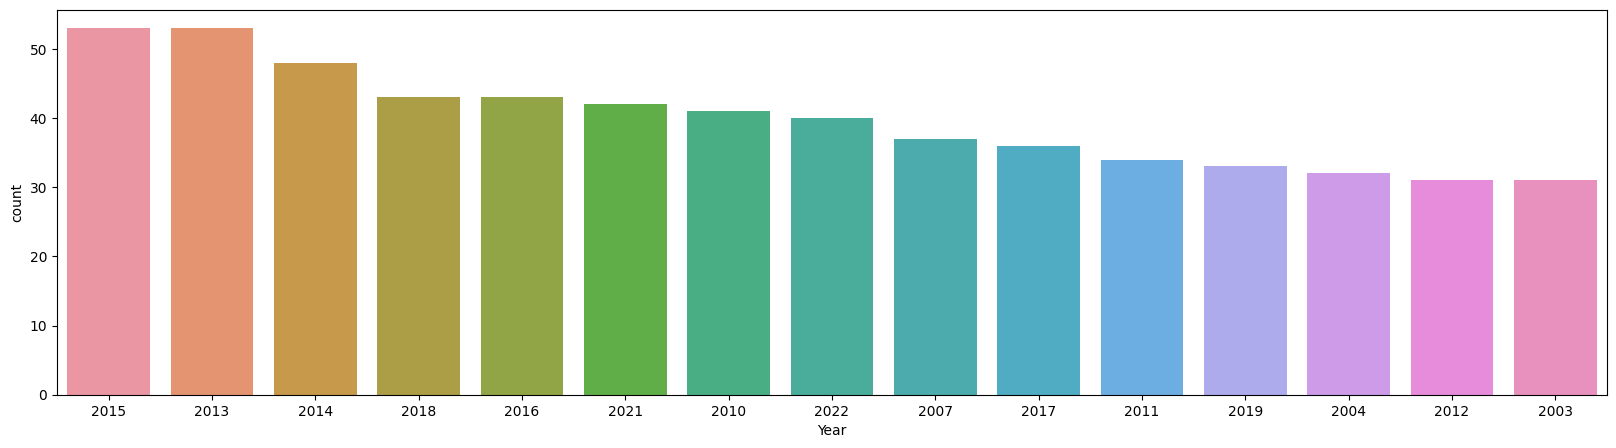

In [21]:
plt.figure(figsize=(20,5))
o=df['Year'].value_counts().head(15).index
sns.countplot(x='Year',data=df,order=o)
#In 2015 and 2013, the world experienced the highest number of earthquakes. 

Text(0.5, 1.0, 'NUMBER OF EARTHQUAKES ENCOUNTERED IN PAPUA NEW GUINEA PER YEAR')

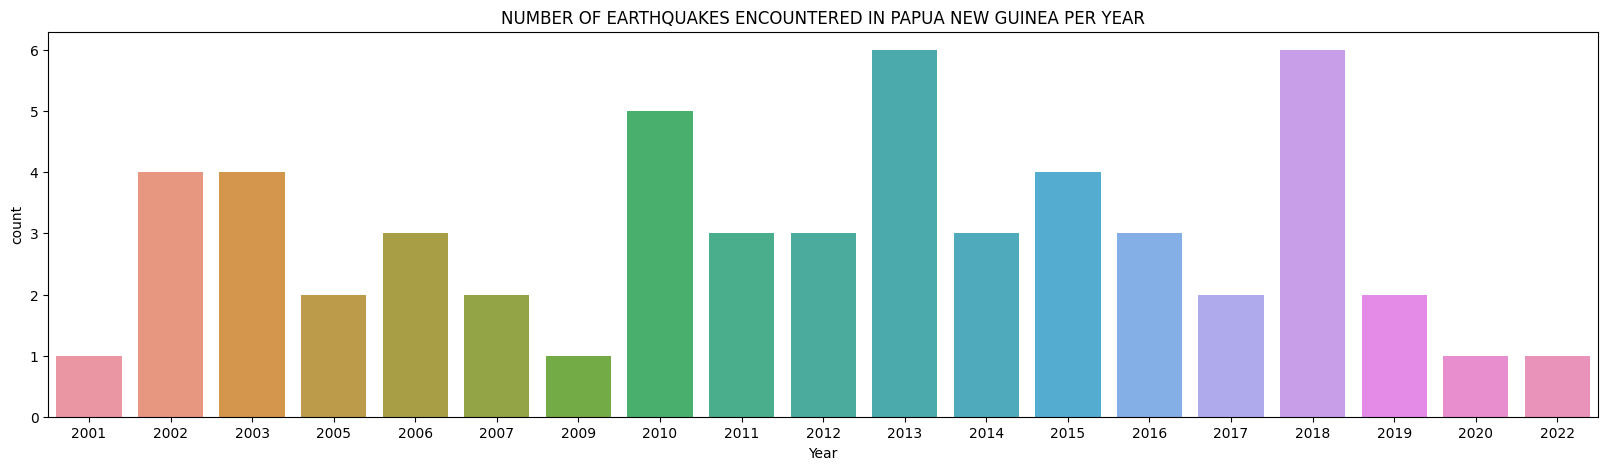

In [22]:
Papua=df[df['country']=='Papua New Guinea']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Papua)
plt.title('NUMBER OF EARTHQUAKES ENCOUNTERED IN PAPUA NEW GUINEA PER YEAR')
#Papua New Guinea experiences at least one earthquake per year

Text(0.5, 1.0, 'NUMBER OF EARTHQUAKES ENCOUNTERED IN INDONESIA PER YEAR')

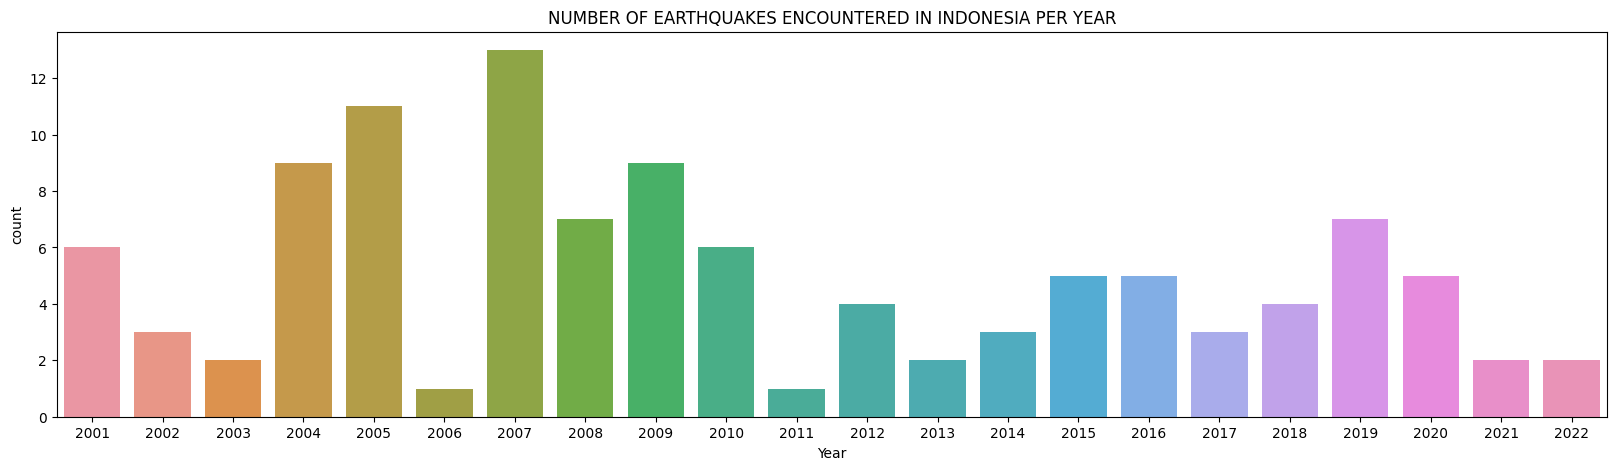

In [23]:
Indo=df[df['country']=='Indonesia']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Indo)
plt.title('NUMBER OF EARTHQUAKES ENCOUNTERED IN INDONESIA PER YEAR')
#Indonesia encountered 13 earthquic in the year 2007

Text(0.5, 1.0, 'NUMBER OF EARTHQUAKES ENCOUNTERED IN PHILIPPINES PER YEAR')

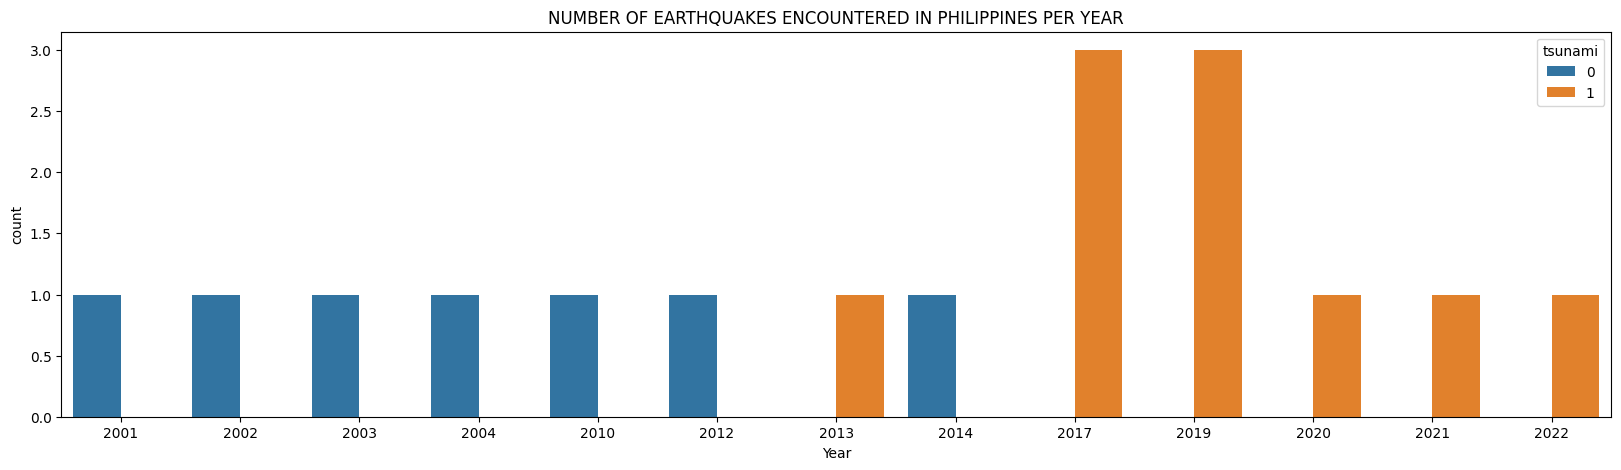

In [24]:

Phi=df[df['country']=='Philippines']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Phi,hue='tsunami')
plt.title('NUMBER OF EARTHQUAKES ENCOUNTERED IN PHILIPPINES PER YEAR')
# The Philippines has experienced all of tsunamis in recent years following earthquakes.

# FEATURE ENGINEERING

In [25]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,Year,Month
0,7.0,8,7,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,Solomon Islands,2022,11
1,6.9,4,4,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,NaN,2022,11
2,7.0,3,3,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,Fiji,2022,11
3,7.3,5,5,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,NaN,2022,11
4,6.6,0,2,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,2022,11


In [26]:
df.drop('country',axis=1,inplace=True)#we have latitude and longitude

In [27]:
df.magType.value_counts()

magType
mww    468
mwc    217
mwb     70
mw      16
Mi       4
ms       2
mb       2
md       2
ml       1
Name: count, dtype: int64

In [28]:
df.net.value_counts()

net
us          747
ak           11
official      8
nc            3
duputel       3
at            2
pt            2
ci            2
hv            2
nn            1
uw            1
Name: count, dtype: int64

In [29]:
obj=df.select_dtypes(include=['object'])
obj
#we can drop net because 95% of data contributed by US 

,net,magType
0,us,mww
1,us,mww
2,us,mww
3,us,mww
4,us,mww
...,...,...
777,us,mwc
778,ak,mw
779,us,mwb
780,us,mwc


In [30]:
obj.nunique()

net        11
magType     9
dtype: int64

In [31]:
obj.drop('net',axis=1,inplace=True)
df.drop(['net','magType'],axis=1,inplace=True)

from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
obj_lbl=obj.apply(lr.fit_transform)
df=pd.concat([df,obj_lbl],axis=1)
df

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
0,7.0,8,7,1,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,8
1,6.9,4,4,0,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,8
2,7.0,3,3,1,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,8
3,7.3,5,5,1,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,8
4,6.6,0,2,1,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,0,912,427,0.000,0.0,60.000,13.0490,-88.660,2001,1,7
778,6.9,5,7,0,745,0,0.000,0.0,36.400,56.7744,-153.281,2001,1,5
779,7.1,0,7,0,776,372,0.000,0.0,103.000,-14.9280,167.170,2001,1,6
780,6.8,0,5,0,711,64,0.000,0.0,33.000,6.6310,126.899,2001,1,7


<Axes: >

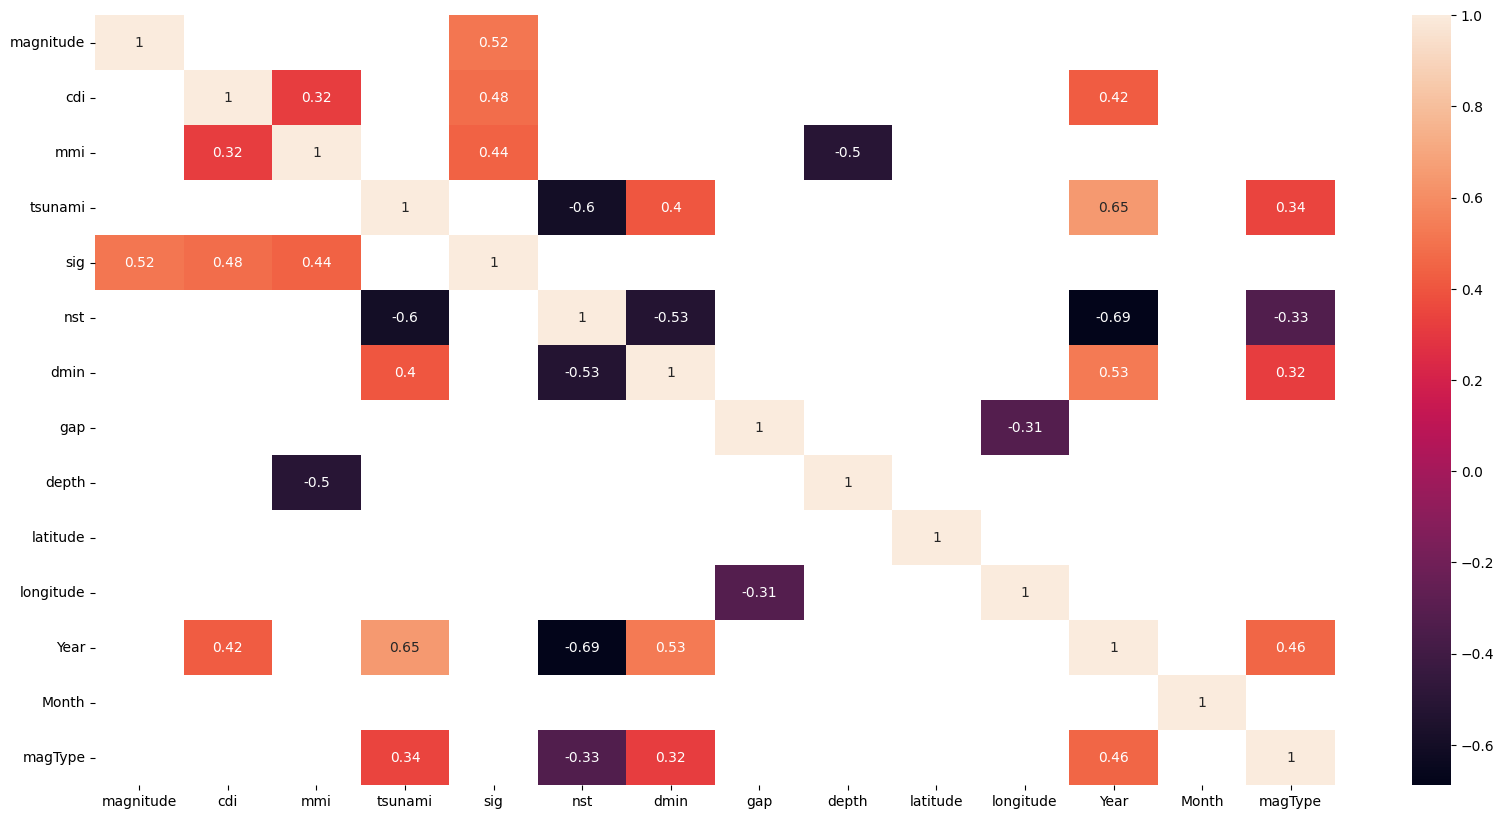

In [32]:
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
sns.heatmap(d,annot=True)

# SCALING AND MODEL BUILDING

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [34]:
X=df.drop('tsunami',axis=1)
y=df['tsunami']

<Axes: xlabel='tsunami', ylabel='count'>

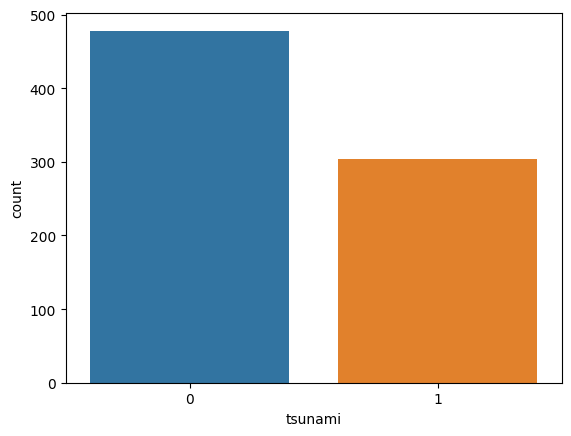

In [35]:
sns.countplot(x=y,data=df)

In [36]:
y.value_counts()


tsunami
0    478
1    304
Name: count, dtype: int64

# DEALING WITH IMBALANCE DATA

In [37]:
from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler(random_state=42)
X,y= rs.fit_resample(X,y)

y.value_counts()



tsunami
1    478
0    478
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45,test_size=0.2)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (r2_score, 
                             mean_absolute_error, classification_report,
                             mean_squared_error )


In [40]:


DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(X_train)
test_pred= DT.predict(X_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)


********************
********************
Train accuracy: 1.0
Test accuracy: 0.953125
********************
********************
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.95        93

    accuracy                           0.95       192
   macro avg       0.95      0.95      0.95       192
weighted avg       0.95      0.95      0.95       192

********************
95.31% Accurate
********************


In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.9270833333333334
train accuracy: 1.0
********************
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        99
           1       0.89      0.97      0.93        93

    accuracy                           0.93       192
   macro avg       0.93      0.93      0.93       192
weighted avg       0.93      0.93      0.93       192

********************
92.71% Accurate


In [42]:
from xgboost import XGBClassifier

XGB = XGBClassifier(random_state=42)
XGB.fit(X_train, y_train)


train_prediction= XGB.predict(X_train)
test_prediction= XGB.predict(X_test)
print('*'*20)

print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
XGB_SC = accuracy_score(test_prediction,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")


********************
test accuracy: 0.9635416666666666
train accuracy: 1.0
********************
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        99
           1       0.94      0.99      0.96        93

    accuracy                           0.96       192
   macro avg       0.96      0.96      0.96       192
weighted avg       0.96      0.96      0.96       192

********************
96.35% Accurate


In [43]:
LR = LogisticRegression()
LR.fit(X_train, y_train)


# prediction
train_prediction= LR.predict(X_train)
test_prediction= LR.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)



print(classification_report(y_test,test_pred))

print('*'*20)


lr_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(lr_HSC*100,2)}% Accurate")

********************
test accuracy: 0.7864583333333334
train accuracy: 0.8429319371727748
********************
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.95        93

    accuracy                           0.95       192
   macro avg       0.95      0.95      0.95       192
weighted avg       0.95      0.95      0.95       192

********************
78.65% Accurate


In [44]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(random_state=42)
ada.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= ada.predict(X_train)
test_prediction= ada.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)



#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
ada_SC = accuracy_score(test_prediction,y_test)
print(f"{round(ada_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.9479166666666666
train accuracy: 0.9672774869109948
********************
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        99
           1       0.93      0.97      0.95        93

    accuracy                           0.95       192
   macro avg       0.95      0.95      0.95       192
weighted avg       0.95      0.95      0.95       192

********************
94.79% Accurate


In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= gb.predict(X_train)
test_prediction= gb.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)



#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
gb_SC = accuracy_score(test_prediction,y_test)
print(f"{round(gb_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.9635416666666666
train accuracy: 0.9882198952879581
********************
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        99
           1       0.93      1.00      0.96        93

    accuracy                           0.96       192
   macro avg       0.97      0.96      0.96       192
weighted avg       0.97      0.96      0.96       192

********************
96.35% Accurate


In [46]:
from sklearn.neighbors import KNeighborsClassifier  
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= knn.predict(X_train)
test_prediction= knn.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_test,test_prediction))
print('test accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)


#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
knn_SC = accuracy_score(test_prediction,y_test)
print(f"{round(knn_SC*100,2)}% Accurate")

********************
********************
train accuracy: 0.828125
test accuracy: 0.9070680628272252
********************
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        99
           1       0.79      0.87      0.83        93

    accuracy                           0.83       192
   macro avg       0.83      0.83      0.83       192
weighted avg       0.83      0.83      0.83       192

********************
82.81% Accurate


In [47]:
score = [DT_SC,RF_SC,lr_HSC,knn_SC,XGB_SC,gb_SC,ada_SC]
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest", "logistic Regression",'Knn','XGBoost',"GradientBoosting","AdaBoostClassifier"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
4,XGBoost,0.963542
5,GradientBoosting,0.963542
0,Decision Tree,0.953125
6,AdaBoostClassifier,0.947917
1,Random Forest,0.927083
3,Knn,0.828125
2,logistic Regression,0.786458


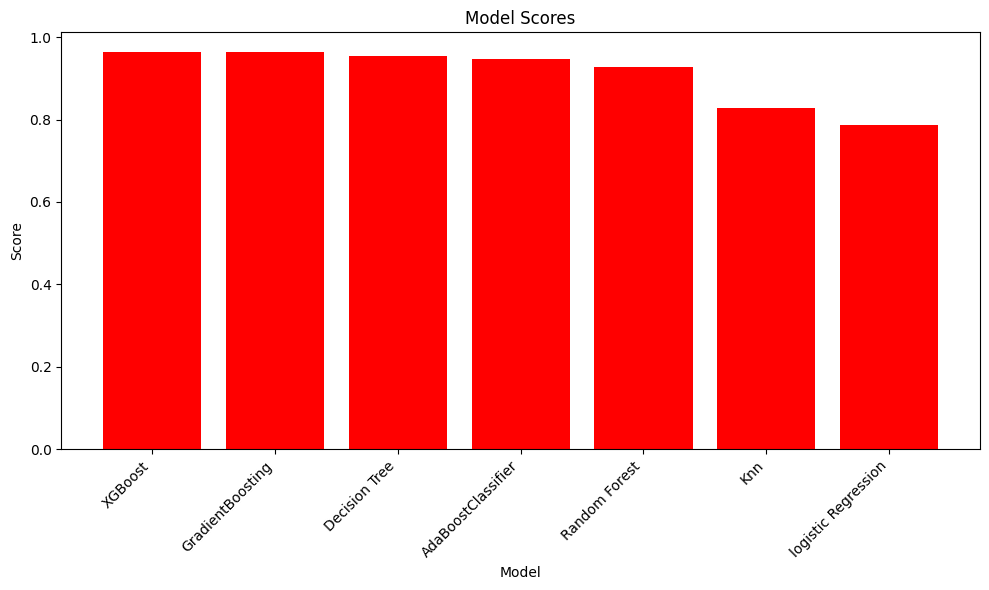

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming score and Models are already defined as per your code

# Create a DataFrame
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest", "logistic Regression",'Knn','XGBoost',"GradientBoosting","AdaBoostClassifier"],
    'Score': score
})

# Sort the DataFrame by 'Score' in descending order
Models_sorted = Models.sort_values(by='Score', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(Models_sorted['Model'], Models_sorted['Score'], color='red')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [49]:
X_train

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
381,6.5,4,5,668,0,3.097,11.0,112.000,-7.4400,128.221,2013,9,8
9,7.6,9,8,1799,271,1.153,69.0,26.943,18.3667,-103.252,2022,9,8
678,6.7,7,4,703,459,0.000,37.3,10.000,49.2770,-128.772,2004,11,6
409,7.1,9,6,780,334,0.000,16.5,21.000,-10.9280,166.018,2013,2,8
591,7.9,8,7,1133,446,0.000,29.1,35.000,-2.6250,100.841,2007,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,6.7,7,8,782,493,0.000,23.9,8.000,37.3360,136.588,2007,3,7
544,7.3,7,8,1560,464,0.000,27.2,19.000,16.7310,-86.217,2009,5,7
892,7.0,9,8,1351,152,5.276,22.0,33.729,17.5978,120.809,2022,7,8
643,7.6,9,9,1267,724,0.000,21.1,26.000,34.5390,73.588,2005,10,7


In [50]:

xgb=XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)

# Get feature importance scores
feature_importances = xgb.feature_importances_

# Get the names of the features from your dataset
imp_feature=pd.DataFrame(index=X.columns,data=feature_importances,columns=['feature importance'])
imp_feature
# Create a DataFrame with feature names and their corresponding importances


,feature importance
magnitude,0.041388
cdi,0.020732
mmi,0.011471
sig,0.018709
nst,0.023030
dmin,0.014801
gap,0.018242
depth,0.029649
latitude,0.043502
longitude,0.085586


In [53]:
imp_feature=imp_feature[imp_feature['feature importance']>0.02]
b=imp_feature.sort_values('feature importance')
b.index

Index(['cdi', 'nst', 'depth', 'magnitude', 'latitude', 'longitude', 'Year'], dtype='object')

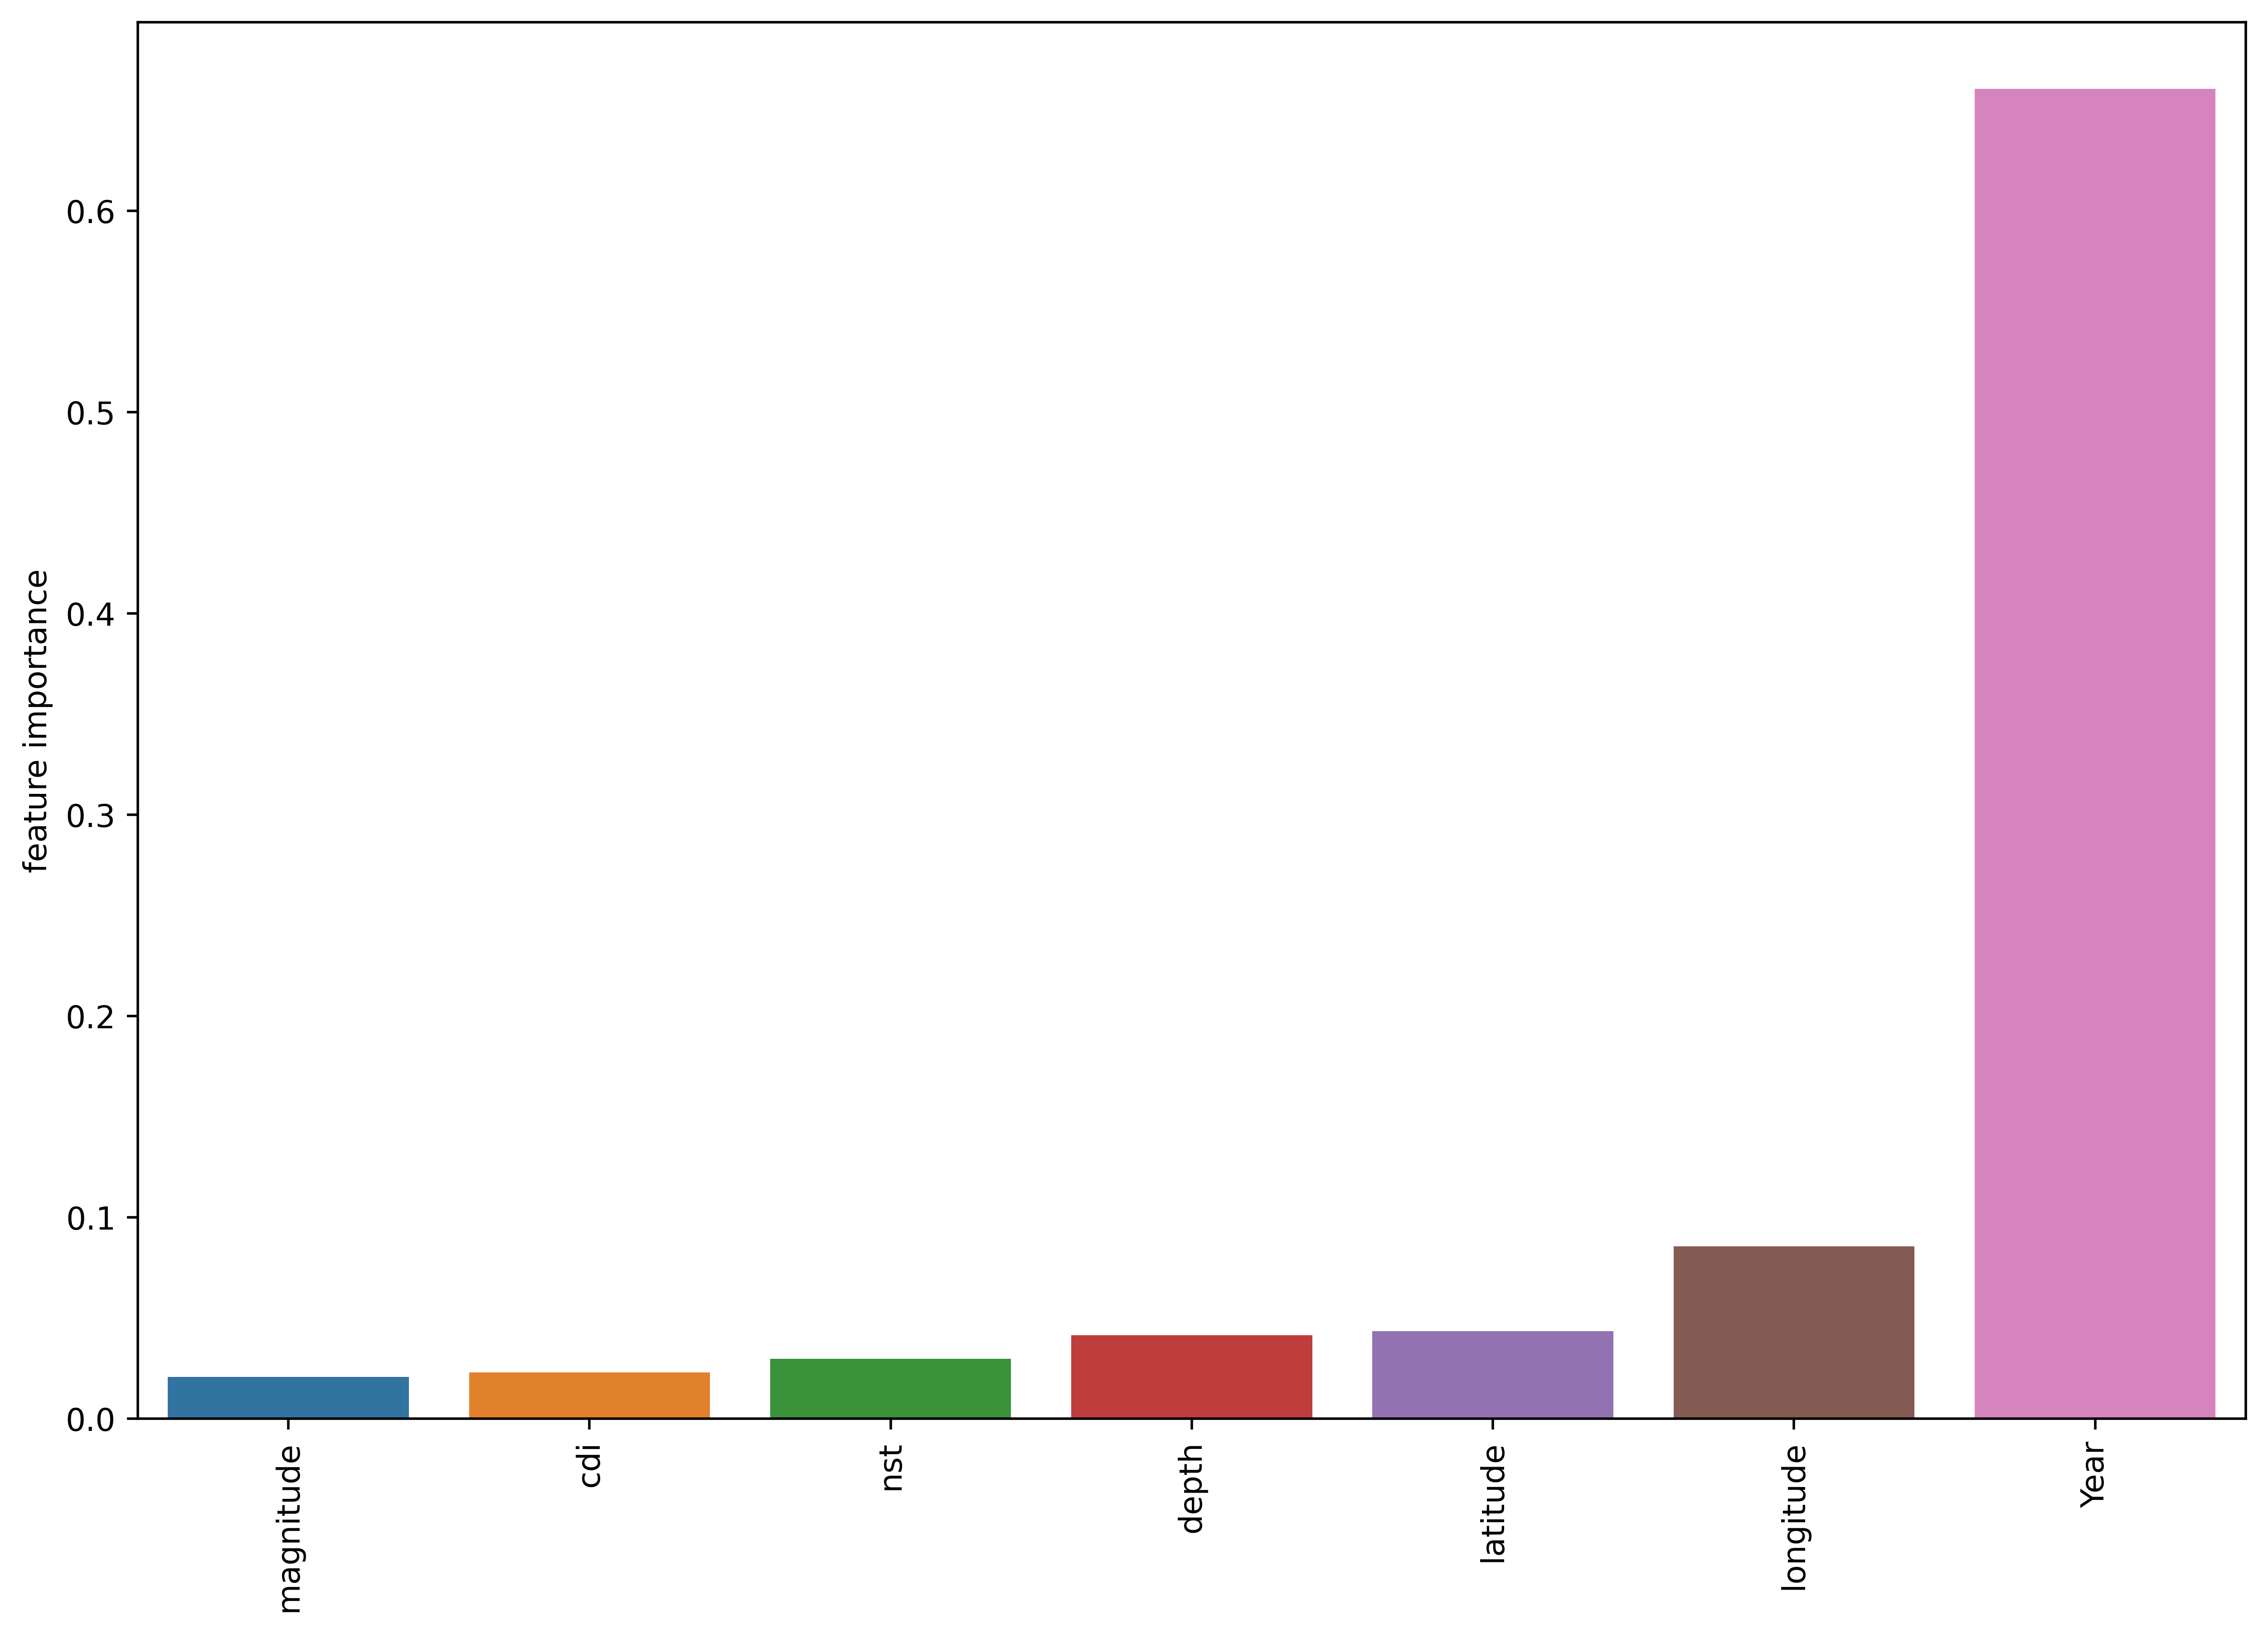

In [54]:
plt.figure(figsize=(12,8),dpi=(500))
sns.barplot(data=b,x=imp_feature.index,y='feature importance')
plt.xticks(rotation=90)
plt.show()

In [55]:
X=X[['cdi', 'nst', 'depth', 'magnitude', 'latitude', 'longitude', 'Year']]

In [56]:
import imblearn
import pandas as pd


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [57]:
from xgboost import XGBClassifier

xbc=XGBClassifier(random_state=42)
xbc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= xbc.predict(X_train)
test_prediction= xbc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)


#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
xbc_SC = accuracy_score(test_prediction,y_test)
print(f"{round(xbc_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.9427083333333334
train accuracy: 1.0
********************
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        99
           1       0.92      0.97      0.94        93

    accuracy                           0.94       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.94      0.94      0.94       192

********************
94.27% Accurate


In [58]:
import pickle
#save the model
model =xbc# Your machine learning model object
file_path = 'xbg_earth.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [59]:
# load the model
import pickle

file_path = 'xbg_earth.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [63]:
X_train

,cdi,nst,depth,magnitude,latitude,longitude,Year
414,8,460,24.00,8.0,-10.7990,165.1140,2013
724,0,431,40.20,6.8,-4.6940,153.2380,2003
223,9,0,94.54,7.9,-4.5049,153.5220,2016
756,0,605,123.80,6.5,39.4020,141.0890,2001
945,0,0,122.00,6.5,-15.0691,167.3720,2014
...,...,...,...,...,...,...,...
767,0,518,33.00,8.4,-16.2650,-73.6410,2001
72,5,0,13.23,6.6,54.7018,163.2080,2021
908,6,0,17.00,6.6,56.9401,162.7860,2017
235,9,0,8.00,6.6,42.8621,13.0961,2016


In [64]:
import pandas as pd

# Assuming these are the column names used during training
column_names = ['cdi', 'nst', 'depth', 'magnitude', 'latitude', 'longitude', 'Year']
# Create a DataFrame for the input data with the same structure
input_data = pd.DataFrame([[8,117,14,7,-9.7,159.59,2022]], columns=column_names)

# Ensure that the model and preprocessing steps are correctly loaded and applied
# loaded_model is your pre-trained model
prediction = loaded_model.predict(input_data)

print("Prediction:", prediction)


Prediction: [1]


In [67]:
import pandas as pd

# Assuming these are the column names used during training
column_names = ['cdi', 'nst', 'depth', 'magnitude', 'latitude', 'longitude', 'Year']
# Create a DataFrame for the input data with the same structure
input_data = pd.DataFrame([[9,141,12,6.6,29.72,102.27,2022]], columns=column_names)

# Ensure that the model and preprocessing steps are correctly loaded and applied
# loaded_model is your pre-trained model
prediction = loaded_model.predict(input_data)

print("Prediction:", prediction)


Prediction: [0]


In [61]:
# df.to_csv("earth_clean.csv",index=False)